In [118]:
# load package
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from IPython import display
%matplotlib inline

In [119]:
# load data
filenames =glob.glob('*.csv')
print(filenames)

['calendar.csv', 'listings.csv', 'reviews.csv']


In [120]:
files = [pd.read_csv(fname, low_memory=False) for fname in filenames]
# roughly review 
for i in files:
    display.display_html(i.head())    
    print(i.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


(3818, 92)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 6)


In [121]:
calendar, listings, reviews = files

#### We have 3 tables all associate with listing_id. 
- Listings, including full descriptions and average review score.
- Reviews, including unique id for each reviewer and detailed comments.
- Calendar, including listing id and the price and availability for that day.

# Questions:
- ### Find the top 10 rating and occupancy listings in Seattle before Jan 2016 .
- ### The key features for top 10 ? 
- ### Can we predict if a room is available or not in next week?

In [122]:
# let first take look at the listings. I guess it includes all the rooms provided by airbnb seattle.

if listings.id.nunique() == listings.shape[0]:
    print('There are {} rooms provided by Airbnb Seattle'.format(listings.shape[0]))
else:
    print('There are duplicates of ID in this table')

There are 3818 rooms provided by Airbnb Seattle


In [123]:
# check if other two tables have same number of rooms.
number = 3818
for i in [0,2]:
    print('The number of rooms is {} in file {}'.format(files[i].listing_id.nunique(),filenames[i]))
    d = number - files[i].listing_id.nunique() 
    if d != 0:
        print('The difference is {} '.format(d))


The number of rooms is 3818 in file calendar.csv
The number of rooms is 3191 in file reviews.csv
The difference is 627 


### Q:if the lack of id correspond to the missing data in listing table?

#### investigate

In [124]:
# How many columns have missing data in listing file.
missing_col_name = listings.columns[listings.isnull().mean()> 0].tolist()
print('{} columns have missing data in listing table, proportion:{}'.format(len(missing_col_name),\
                                                                            len(missing_col_name)/listings.shape[1]))


45 columns have missing data in listing table, proportion:0.4891304347826087


In [125]:
# How many rows associate with review have missing . If it equal to 627?
# find the col indicate the scores
review_col = [i for i in listings.columns if 'review' in i ]

In [126]:
for i in review_col:
    if i in missing_col_name:
        print('Missing rows in {} : {}'.format(i,listings[i].isnull().value_counts()[1]))
    else:
        print('No missing row :{}'.format(i))

No missing row :number_of_reviews
Missing rows in first_review : 627
Missing rows in last_review : 627
Missing rows in review_scores_rating : 647
Missing rows in review_scores_accuracy : 658
Missing rows in review_scores_cleanliness : 653
Missing rows in review_scores_checkin : 658
Missing rows in review_scores_communication : 651
Missing rows in review_scores_location : 655
Missing rows in review_scores_value : 656
Missing rows in reviews_per_month : 627


#### investigate Conclusion: We can find that there are three columns with 627 missing rows which equal to the number of the lack room id in review file. According to the airbnb data description, the review indicate the activity of the listing.  

#### Q:And for those which didn't have review listing, were they belong to new source which haven't have a reviewer? Or those are never be booked? 

#### Try 1

In [127]:
# let's check if any feature indicate or may associate with if a listing is new.
cat_col = listings.select_dtypes(include='object')

In [128]:
# find the columns which include date in listing file
import re
regex = re.compile(r'\d{4}\-\d{2}\-\d{2}')

In [129]:
date_cols = []
for idx,i in enumerate(cat_col.describe().values[2]):
    if regex.match(i):
        date_cols.append(cat_col.columns[idx])       
        

In [130]:
cat_col[date_cols].describe()

,last_scraped,host_since,calendar_last_scraped,first_review,last_review
count,3818,3816,3818,3191,3191
unique,1,1380,1,984,321
top,2016-01-04,2013-08-30,2016-01-04,2015-09-21,2016-01-02
freq,3818,51,3818,25,94


##### We can ignore or drop scraped columns due to they are constant 

In [131]:
scraped = ['last_scraped','calendar_last_scraped']
for i in scraped:
    date_cols.remove(i)

In [132]:
cat_col[date_cols].sort_values(by=['host_since','first_review']).head(10)

,host_since,first_review,last_review
2190,2008-11-10,2015-06-08,2015-09-28
2192,2008-11-10,2015-08-16,2015-09-30
2194,2008-11-10,2015-08-16,2015-12-02
2184,2008-11-10,NaN,NaN
1413,2009-01-08,2013-09-30,2015-12-01
2978,2009-02-16,2015-07-07,2016-01-03
3020,2009-02-16,2015-07-27,2015-08-11
2166,2009-03-03,2010-03-21,2015-12-14
2242,2009-03-30,2015-03-22,2015-12-09
377,2009-04-26,2009-07-17,2015-12-28


####  Try 1 result :According to above table, we can see that the first review date didn't relate to host_since date. So this is not what we are searching that can dived the listing into old and new source.

#### Try 2

In [133]:
# collect listing id which has no reviews
noreview_id = listings.loc[listings.number_of_reviews ==0,'id'].tolist()

In [134]:
# check the date range in reviews file.
print('reviews file date range: {} to {}'.format(reviews.date.min(),reviews.date.max()))
print('calendar file date range: {} to {}'.format(calendar.date.min(),calendar.date.max()))

reviews file date range: 2009-06-07 to 2016-01-03
calendar file date range: 2016-01-04 to 2017-01-02


#### Try2 result:  The 627 no reviews listing's calender start after the reviews' cut day. They were new source since the reviews cut day. So for the missint value in listing file, we can add a feature indicate if the listing was new or not.

### As we know that the 627 are new, we can focus on the rest listing and find the top 10 popular listing.

In [135]:
# collect candidates

cols=['id']
cols.extend(review_col)
candidate = listings.loc[~listings.id.isin(noreview_id),cols]

### Q: How to chose the top 10? There are some value about the scores and rating. Let's find out a way to select the most popular listing.

In [136]:
candidate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 3814
Data columns (total 12 columns):
id                             3191 non-null int64
number_of_reviews              3191 non-null int64
first_review                   3191 non-null object
last_review                    3191 non-null object
review_scores_rating           3171 non-null float64
review_scores_accuracy         3160 non-null float64
review_scores_cleanliness      3165 non-null float64
review_scores_checkin          3160 non-null float64
review_scores_communication    3167 non-null float64
review_scores_location         3163 non-null float64
review_scores_value            3162 non-null float64
reviews_per_month              3191 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 324.1+ KB


In [137]:
candidate.select_dtypes(exclude='object').describe()

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.191000e+03,3191.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,5.024827e+06,26.590097,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,2.802502e+06,39.840788,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,4.291000e+03,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.712948e+06,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,5.308339e+06,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,7.467034e+06,31.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,1.024814e+07,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


In [138]:
candidate.review_scores_rating.isnull().value_counts()

False    3171
True       20
Name: review_scores_rating, dtype: int64

#### Q:There are 20 listing has no rating score. Let's try to find the reason

In [139]:
missing_rating_id = candidate[candidate['review_scores_rating'].isnull()==True].id.tolist()

In [140]:
reviews[reviews.listing_id.isin(missing_rating_id)]

,listing_id,id,date,reviewer_id,reviewer_name,comments
7581,692080,25895964,2015-01-28,12059638,Skylar,The reservation was canceled 170 days before a...
10501,8338155,55044907,2015-11-27,16305509,Courtney,The host canceled this reservation the day bef...
14066,7614244,58458460,2016-01-02,4772223,Belle,The host canceled this reservation 13 days bef...
15175,9012948,52668525,2015-10-31,47464538,Nathan,The host canceled this reservation 28 days bef...
16754,9028447,56360049,2015-12-12,12904363,Jenny,The host canceled this reservation 10 days bef...
21108,8207848,47237888,2015-09-16,39257911,Julie,The host canceled this reservation 68 days bef...
24470,8080939,47024783,2015-09-14,34936450,Mateusz,The host canceled this reservation 11 days bef...
40488,7536074,39721859,2015-07-25,38094557,Billy & Lindsey,The host canceled this reservation 5 days befo...
54597,5336585,27568467,2015-03-07,23595720,Matt,The reservation was canceled the day before ar...
55636,186328,8620481,2013-11-08,9011692,Darius,The reservation was canceled 43 days before ar...


#### As we see, those listing only have one review and be canceld. So there was only review  record. So when we select the to10, we can ignore those missing score rows.

In [141]:
top10_rating = candidate.loc[(candidate.review_scores_rating.notnull() == True),['id','review_scores_rating','reviews_per_month']].\
sort_values(by=['review_scores_rating','reviews_per_month',],ascending=False)[:10]

In [142]:
top10_rating

,id,review_scores_rating,reviews_per_month
2107,5056580,100.0,10.95
2791,9436832,100.0,7.32
3581,1974131,100.0,7.15
2783,9494415,100.0,7.00
814,4757025,100.0,6.92
3715,4871348,100.0,6.20
2601,9580021,100.0,6.15
1865,9328278,100.0,6.00
3482,9508837,100.0,5.62
1003,6475289,100.0,5.34


In [143]:
top10_reviews = candidate.loc[(candidate.review_scores_rating.notnull() == True),['id','review_scores_rating','reviews_per_month']].\
sort_values(by=['reviews_per_month','review_scores_rating'],ascending=False)[:10]

In [144]:
top10_reviews

,id,review_scores_rating,reviews_per_month
178,6886633,95.0,12.15
1085,8015531,95.0,11.01
2107,5056580,100.0,10.95
3058,3861673,99.0,10.61
2215,6577295,95.0,10.27
1441,365550,94.0,10.12
1458,8372038,97.0,10.00
2138,5705161,96.0,9.72
2445,7483750,94.0,9.70
2145,7362757,97.0,9.63


#### At last, we decide to selet two top 10 for rating score and occupancy per month

In [145]:
# store top 10 listing id
# topS = topScore topR = topReviews
topS_id = top10_rating.id.tolist()
topR_id = top10_reviews.id.tolist()

In [146]:
# prepare price which will be used later

def str2float(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = float(x)
    
    return x

listings.price = listings.price.apply(lambda x:str2float(x))

In [147]:
listings.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

### Q: Compared occupancy top and rating top

In [148]:
# collect some basic features which customer may concern to compare.
top_status = ['id','price','zipcode','space','description',\
              'transit','room_type','bed_type','neighbourhood_cleansed']

top10_S = listings[top_status][listings.id.isin(topS_id)]
top10_S['Top'] = 'Rating'

top10_R = listings[top_status][listings.id.isin(topR_id)]
top10_R['Top'] = 'occupancy'

top10_status = pd.concat([top10_R,top10_S])

In [149]:
top10_status.head()

,id,price,zipcode,space,description,transit,room_type,bed_type,neighbourhood_cleansed,Top
178,6886633,75.0,98107,"Now's your chance to get away from it all, rig...","This is a 1957 El Rey, cousin of the Airstream...",The closest bus-stop is two blocks away where ...,Entire home/apt,Pull-out Sofa,West Woodland,occupancy
1085,8015531,114.0,98101,"One block from Pike Place. Vibrant, highly-so...",Enjoy staying in Seattle's vibrant downtown di...,NaN,Entire home/apt,Real Bed,Pike-Market,occupancy
1441,365550,89.0,98104,This is studio #17 - one of two private airbnb...,** Please read our entire listing description ...,This is a great spot for public transportation...,Private room,Real Bed,International District,occupancy
1458,8372038,120.0,98104,Huge apartment for you to use hoping to make y...,This huge open-plan 2 bedroom with large livin...,The Pioneer Square Light Rail Station is a few...,Entire home/apt,Real Bed,Central Business District,occupancy
2107,5056580,99.0,98144,Welcome to my professionally designed luxury 8...,Gorgeous professionally-designed 850 square fo...,A quick 5-minute walk to the Beacon Hill light...,Entire home/apt,Real Bed,North Beacon Hill,occupancy


In [150]:
import matplotlib.pyplot as plt

### Visulization

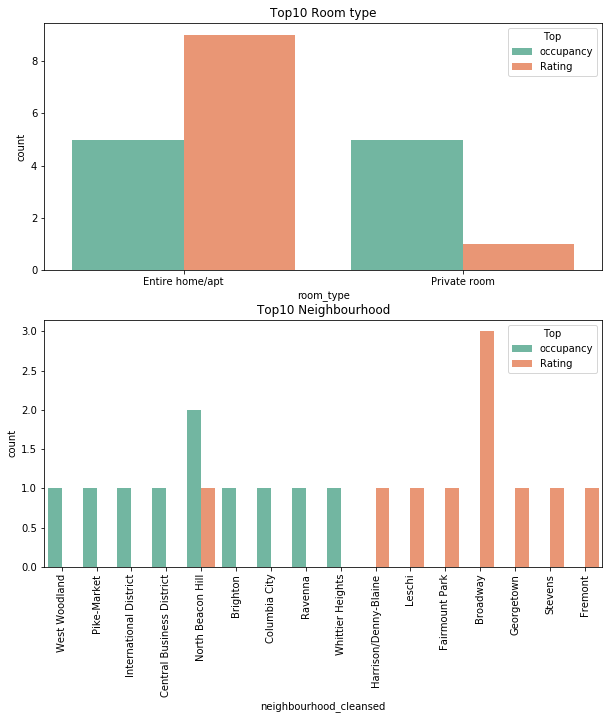

In [151]:
f = plt.figure(figsize=(10,10))
plt.subplot(211)
#plt.xticks(rotation=90)
plt.title('Top10 Room type');
sns.countplot(x='room_type',data=top10_status,hue='Top',palette="Set2");

plt.subplot(212)
plt.xticks(rotation=90)
plt.title('Top10 Neighbourhood');
sns.countplot(x='neighbourhood_cleansed',data=top10_status,hue='Top',palette="Set2");


#### There are two types of room in the two groups. Most listings in rating group were entier home type. But for occupancy group, it's half half. The second plot didn't show any correlation between neighbourhood and group type.

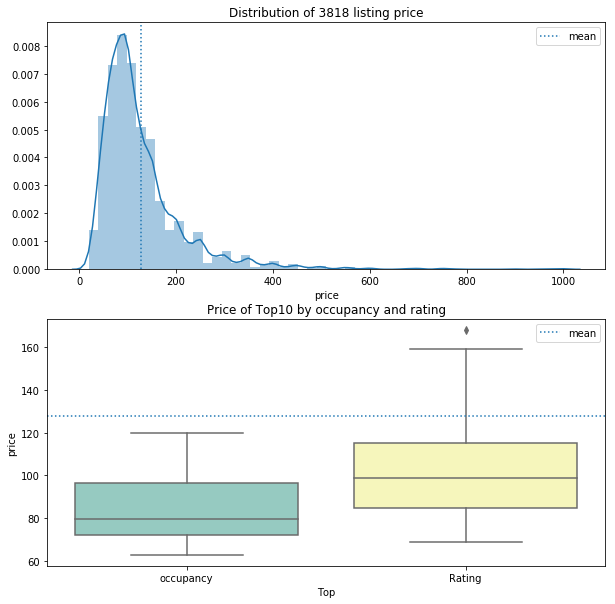

In [152]:
f = plt.figure(figsize=(10,10))
plt.subplot(211)
sns.distplot(listings.price);
p1 = plt.axvline(x=127.9,ls=":");
plt.legend(handles=[p1],labels=['mean'],loc='best');
plt.title("Distribution of 3818 listing price")
plt.subplot(212)
sns.boxplot(x = 'Top',y='price',data=top10_status,palette="Set3");
p1 = plt.axhline(y=127.9,ls=":");
p2 = plt.title("Price of Top10 by occupancy and rating");
#plt.xticks(rotation=90);
plt.legend(handles=[p1],labels=['mean'],loc='best');

#### The price of top 10 occupancy listing were under the avarage price and much less than top 10 rating. That make sense.

In [153]:
# let's see the review status of two top 10 groups.
topS_review = reviews[reviews.listing_id.isin(topS_id)].sort_values(by=['date','listing_id'])
topR_review = reviews[reviews.listing_id.isin(topR_id)].sort_values(by=['date','listing_id'])

In [154]:
import nltk

In [155]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
import re

In [156]:
import string

In [157]:
def clean_comment(df):
    
    stopword = stopwords.words('english')
    punctuation = string.punctuation+"``'s\\"
    word = word_tokenize(str(df.comments.tolist()).lower())    
    clean_p = [i for i in word if i not in punctuation]    
    print('Remove puncuations {}'.format(len(word)-len(clean_p)))
    clean_s = [i for i in clean_p if i not in stopword]
    print('Remove stopwords {}'.format(len(clean_p)-len(clean_s)))
    
    
    return clean_s
    

In [158]:
clean_S = clean_comment(topS_review)
clean_R = clean_comment(topR_review)

Remove puncuations 6781
Remove stopwords 19692
Remove puncuations 12780
Remove stopwords 35299


In [159]:
def freq_word(clean):
    freq_dist = FreqDist(clean)
    cand_dist = {i[0]:freq_dist[i[0]] for i in nltk.pos_tag(freq_dist.keys()) if i[1] in ['JJ']}
    words_plot = sorted(cand_dist.items(),key=lambda x:x[1],reverse=True)[:50]
    
    return dict(words_plot)

In [160]:
# calculate freq
word_plot_R = freq_word(clean_R)
word_plot_S = freq_word(clean_S)

In [161]:
from pyecharts import WordCloud

In [162]:
wordcloud = WordCloud(width=900, height=620)
wordcloud.add("", attr=[k for k in word_plot_R.keys()], \
              value=[v for v in word_plot_R.values()], \
              word_size_range=[20, 100])
#wordcloud.render()

In [163]:
wordcloud = WordCloud(width=900, height=620)
wordcloud.add("WordCloud Top10 Rating", attr=[k for k in word_plot_S.keys()], \
              value=[v for v in word_plot_S.values()], \
              word_size_range=[20, 100])

### Now let's see the calendar table

In [289]:
cal = pd.read_csv('calendar.csv')

In [290]:
calendar = cal.copy()

In [291]:
# check if each id have same number of rows.
calendar.listing_id.value_counts().describe()

count    3818.0
mean      365.0
std         0.0
min       365.0
25%       365.0
50%       365.0
75%       365.0
max       365.0
Name: listing_id, dtype: float64

###  imputing missing date

In [292]:
# change price type and fill missing value
calendar.price.fillna('$0.00',inplace=True)
calendar.price = calendar.price.apply(lambda x:str2float(x))

In [293]:
# add season features
calendar.date = pd.to_datetime(calendar.date)
calendar['year'] = calendar.date.apply(lambda x:x.year)
calendar['month'] = calendar.date.apply(lambda x:x.month)
calendar['week'] = calendar.date.apply(lambda x:x.weekofyear)
calendar['dayofyear'] = calendar.date.apply(lambda x:x.dayofyear)
calendar['dayofweek'] = calendar.date.apply(lambda x:x.weekday())
calendar['isweekend'] = calendar.dayofweek.isin([5,6]).map({True:1,False:0})

In [173]:
calendar.date.describe()

count                 1393570
unique                    365
top       2016-12-27 00:00:00
freq                     3818
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

In [174]:
# There are only 2 days in 2017, so we now focus on the price in 2016

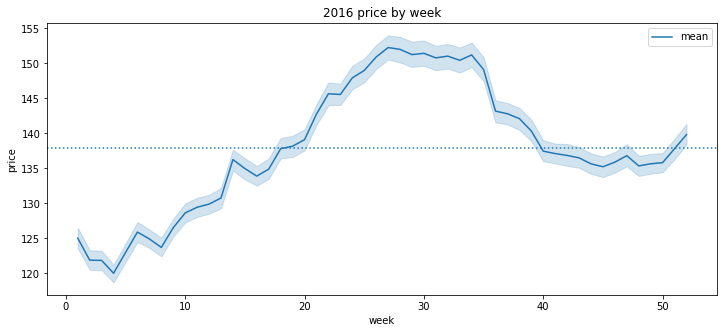

In [175]:
f = plt.figure(figsize=(12,5))
sns.lineplot(x='week',y='price',data=calendar[(calendar.price != 0)]);
plt.axhline(y=137.95,ls=":");
plt.title('2016 price by week')
plt.legend(labels=['mean'],loc='best');

In [176]:
ctopS = calendar[calendar.listing_id.isin(topS_id)]
ctopR = calendar[calendar.listing_id.isin(topR_id)]

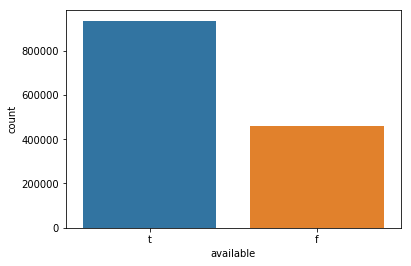

In [177]:
# categorical feature
sns.countplot(x='available',data=calendar);

#### Did 'avaiable' has relationship with 'date' for all the listing?

In [330]:
calendar[calendar.available == 'f'].date.describe()

count                  459028
unique                    365
top       2016-01-04 00:00:00
freq                     2083
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

#### unique 365days means that in 2016 every day have some listing unavilabe. We can't say if these due to randomly occupancy or other like routine clean?

In [179]:
temp = pd.concat([ctopS,ctopR])
temp.loc[:,'listing_id'] = temp.loc[:,'listing_id'].astype('category')

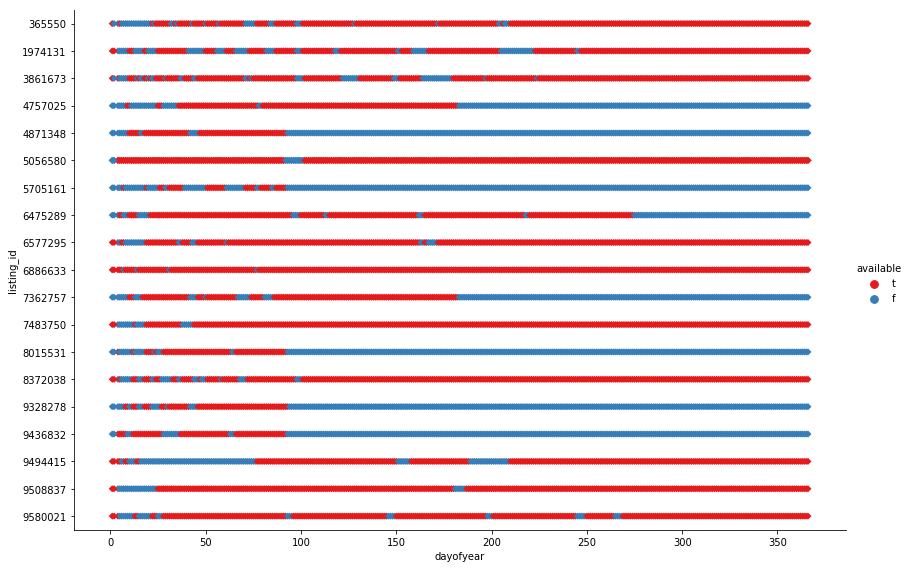

In [180]:
sns.catplot(x='dayofyear',y='listing_id',data=temp,jitter=False,hue='available',\
            height=8,aspect=1.5,palette='Set1',marker='D',);

In [181]:
ids = [4871348,5705161,8015331,9328278,9436832]
temp = listings[listings.id.isin(ids)]

In [182]:
constant_col = temp.columns.tolist()

In [183]:
for i in range(0,len(constant_col),5):
    cols = constant_col[i:i+5]
    display.display_html(temp[cols].head())  
    

,id,listing_url,scrape_id,last_scraped,name
1865,9328278,https://www.airbnb.com/rooms/9328278,20160104002432,2016-01-04,Storybook BnB - Private Studio
2138,5705161,https://www.airbnb.com/rooms/5705161,20160104002432,2016-01-04,Best Seattle Views! Private Suite!
2791,9436832,https://www.airbnb.com/rooms/9436832,20160104002432,2016-01-04,Artsy Charmer in Center of Cap Hill
3715,4871348,https://www.airbnb.com/rooms/4871348,20160104002432,2016-01-04,Private Entrance Bedroom and Bath


,summary,space,description,experiences_offered,neighborhood_overview
1865,This garden-level studio is a private apartmen...,The studio is a mother-in-law unit with privat...,This garden-level studio is a private apartmen...,none,"The Storybook bnb is at the ""mouth"" of West Se..."
2138,"Nestled atop Beacon Hill, my condo offers amaz...","My condo has amazing, panoramic views of what ...","Nestled atop Beacon Hill, my condo offers amaz...",none,The condo is within easy walking distance of u...
2791,Cozy top floor studio centrally located - clos...,This is a top floor corner unit in an old worl...,Cozy top floor studio centrally located - clos...,none,I'm a leasing agent in Seattle and Cap Hill is...
3715,"A clean, quiet and comfortable bedroom and bat...",I do a fair amount of business travel and I tr...,"A clean, quiet and comfortable bedroom and bat...",none,The house is a 5 minute car ride North of down...


,notes,transit,thumbnail_url,medium_url,picture_url
1865,The space is a studio with a queen bed; ideal ...,The bus line is an 8 minute walk down the hill...,https://a2.muscache.com/ac/pictures/c8be8a54-b...,https://a2.muscache.com/im/pictures/c8be8a54-b...,https://a2.muscache.com/ac/pictures/c8be8a54-b...
2138,A day or two before you arrive I will send you...,Public transit is easy from here! I am on two ...,https://a2.muscache.com/ac/pictures/71410566/5...,https://a2.muscache.com/im/pictures/71410566/5...,https://a2.muscache.com/ac/pictures/71410566/5...
2791,"If you need parking, a hair appointment, dry c...",The apartment is right on several major bus li...,https://a2.muscache.com/ac/pictures/159c6e95-4...,https://a2.muscache.com/im/pictures/159c6e95-4...,https://a2.muscache.com/ac/pictures/159c6e95-4...
3715,Just be aware that this is a newly renovated b...,There are nearby busses that will get you wher...,https://a2.muscache.com/ac/pictures/61496623/c...,https://a2.muscache.com/im/pictures/61496623/c...,https://a2.muscache.com/ac/pictures/61496623/c...


,xl_picture_url,host_id,host_url,host_name,host_since
1865,https://a2.muscache.com/ac/pictures/c8be8a54-b...,48414763,https://www.airbnb.com/users/show/48414763,Blake,2015-11-07
2138,https://a2.muscache.com/ac/pictures/71410566/5...,29481973,https://www.airbnb.com/users/show/29481973,Chris,2015-03-17
2791,https://a2.muscache.com/ac/pictures/159c6e95-4...,595610,https://www.airbnb.com/users/show/595610,Elena,2011-05-17
3715,https://a2.muscache.com/ac/pictures/61496623/c...,23468824,https://www.airbnb.com/users/show/23468824,Dominick,2014-11-07


,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate
1865,"Seattle, Washington, United States",We are a married couple living on the upper le...,within an hour,100%,100%
2138,"Seattle, Washington, United States",I work in tax law in Downtown Seattle. I am an...,within an hour,100%,100%
2791,"Seattle, Washington, United States",I love to travel & meet new folks from around ...,within an hour,100%,100%
3715,"Seattle, Washington, United States",Originally from the New York area I've been li...,within an hour,100%,100%


,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count
1865,f,https://a2.muscache.com/ac/pictures/2fac94f7-4...,https://a2.muscache.com/ac/pictures/2fac94f7-4...,The Junction,1.0
2138,t,https://a0.muscache.com/ac/users/29481973/prof...,https://a0.muscache.com/ac/users/29481973/prof...,North Beacon Hill,1.0
2791,t,https://a2.muscache.com/ac/pictures/70e28bec-8...,https://a2.muscache.com/ac/pictures/70e28bec-8...,Capitol Hill,2.0
3715,t,https://a1.muscache.com/ac/users/23468824/prof...,https://a1.muscache.com/ac/users/23468824/prof...,Fremont,1.0


,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street
1865,1.0,"['email', 'phone', 'google', 'reviews', 'kba']",t,t,"37th Avenue Southwest, Seattle, WA 98126, Unit..."
2138,1.0,"['email', 'phone', 'linkedin', 'reviews', 'kba']",t,t,"12th Avenue South, Seattle, WA 98144, United S..."
2791,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,"13th Avenue East, Seattle, WA 98102, United St..."
3715,1.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"North Motor Place, Seattle, WA 98103, United S..."


,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state
1865,The Junction,Fairmount Park,West Seattle,Seattle,WA
2138,North Beacon Hill,North Beacon Hill,Beacon Hill,Seattle,WA
2791,Capitol Hill,Broadway,Capitol Hill,Seattle,WA
3715,Fremont,Fremont,Other neighborhoods,Seattle,WA


,zipcode,market,smart_location,country_code,country
1865,98126,Seattle,"Seattle, WA",US,United States
2138,98144,Seattle,"Seattle, WA",US,United States
2791,98102,Seattle,"Seattle, WA",US,United States
3715,98103,Seattle,"Seattle, WA",US,United States


,latitude,longitude,is_location_exact,property_type,room_type
1865,47.553357,-122.379001,t,House,Entire home/apt
2138,47.591779,-122.318462,t,Apartment,Private room
2791,47.620912,-122.314919,t,Apartment,Entire home/apt
3715,47.659763,-122.346406,t,House,Private room


,accommodates,bathrooms,bedrooms,beds,bed_type
1865,2,1.0,0.0,2.0,Real Bed
2138,3,1.0,1.0,2.0,Real Bed
2791,2,1.0,0.0,1.0,Real Bed
3715,2,1.0,1.0,1.0,Real Bed


,amenities,square_feet,price,weekly_price,monthly_price
1865,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,85.0,NaN,NaN
2138,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",NaN,75.0,$665.00,NaN
2791,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,100.0,NaN,NaN
3715,"{TV,Internet,""Wireless Internet"",""Free Parking...",NaN,70.0,$500.00,NaN


,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights
1865,$200.00,$25.00,1,$10.00,1
2138,$100.00,$15.00,2,$20.00,1
2791,NaN,NaN,1,$0.00,2
3715,NaN,$30.00,1,$0.00,2


,maximum_nights,calendar_updated,has_availability,availability_30,availability_60
1865,60,today,t,15,41
2138,10,4 days ago,t,8,23
2791,13,today,t,21,47
3715,30,a week ago,t,22,47


,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review
1865,71,71,2016-01-04,6,2015-12-11
2138,41,41,2016-01-04,93,2015-03-24
2791,74,74,2016-01-04,10,2015-11-25
3715,76,76,2016-01-04,76,2015-01-02


,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
1865,2016-01-01,100.0,10.0,10.0,10.0
2138,2015-12-14,96.0,10.0,10.0,10.0
2791,2015-12-16,100.0,10.0,10.0,10.0
3715,2016-01-01,100.0,10.0,10.0,10.0


,review_scores_communication,review_scores_location,review_scores_value,requires_license,license
1865,10.0,9.0,9.0,f,NaN
2138,10.0,9.0,10.0,f,NaN
2791,10.0,10.0,10.0,f,NaN
3715,10.0,10.0,10.0,f,NaN


,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
1865,WASHINGTON,f,moderate,f,f
2138,WASHINGTON,t,moderate,f,f
2791,WASHINGTON,t,moderate,f,f
3715,WASHINGTON,f,moderate,f,f


,calculated_host_listings_count,reviews_per_month
1865,1,6.00
2138,1,9.72
2791,2,7.32
3715,1,6.20


In [184]:
temp = pd.concat([ctopS,ctopR])
temp.loc[:,'listing_id'] = temp.loc[:,'listing_id'].astype('category')

In [185]:
temp.drop_duplicates(inplace=True)

In [186]:
temp.shape

(6935, 10)

In [187]:
temp.sort_values(by='date',inplace=True)

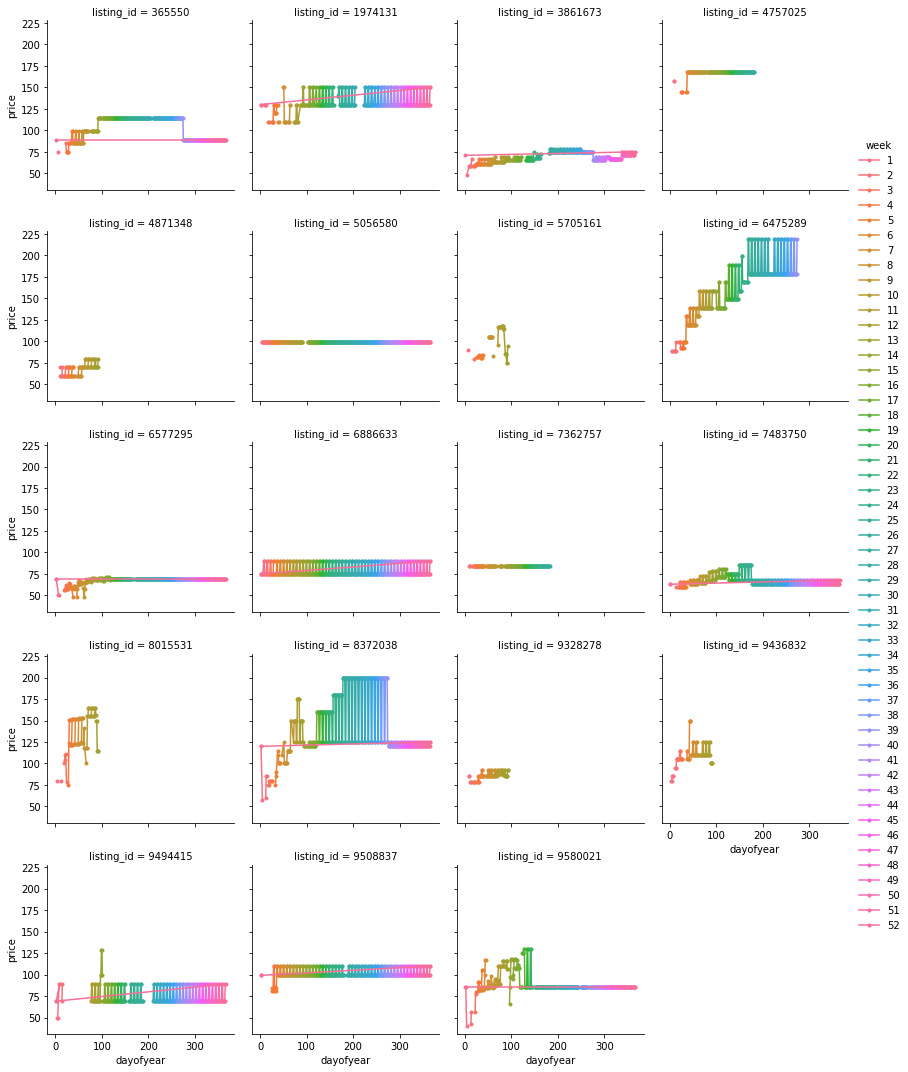

In [188]:
g =sns.FacetGrid(data=temp[temp.available =='t'],col='listing_id',col_wrap=4,\
                 hue='week',hue_order=temp.week.unique().tolist())
g = g.map(plt.plot,'dayofyear','price',marker='.').add_legend()

#### The price fluctuation was correlated with day of week. Price on Fri and Sat was  a little higher than other days. A trend, which was not for all listing, was that the price was very low at the start of year and grow in the middle of year. 

In [ ]:
# let make a simple model to predict the price.
# prepare data

In [189]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 10 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         1393570 non-null float64
year          1393570 non-null int64
month         1393570 non-null int64
week          1393570 non-null int64
dayofyear     1393570 non-null int64
dayofweek     1393570 non-null int64
isweekend     1393570 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 157.0+ MB


In [334]:
calendar['listing_id'][calendar.available == 't'].value_counts().describe()

count    3723.000000
mean      251.018533
std       122.119707
min         1.000000
25%       139.000000
50%       313.000000
75%       360.000000
max       365.000000
Name: listing_id, dtype: float64

#### The number of count is 3723 which is less than total listing number 3818, so we guess some listings were not available in 2016.

In [335]:
avai_df = calendar[['listing_id','date','available','price']]

In [336]:
avai_df = pd.get_dummies(avai_df)

In [337]:
# check if there were some listing unavailable whole year.
grouped = avai_df.groupby(['listing_id'],as_index=False)[['available_t']].sum()
una_id = grouped[grouped.available_t == 0].listing_id.tolist()
print('There were {} unavailable listings in 2016'.format(len(una_id)))

There were 95 unavailable listings in 2016


For those listings, we can drop from data due to there was no price need to predict at all. Also, if the the date a listing was unavailable, there was no price need to predict.

In [339]:
avai_df = avai_df[avai_df.available_t == 1]

In [355]:
calendar[(calendar.listing_id == 10319529) & (calendar.price != 0)]

,listing_id,date,available,price,year,month,week,dayofyear,dayofweek,isweekend
1189577,10319529,2016-02-15,t,49.0,2016,2,7,46,0,0


In [412]:
group_price = avai_df.groupby(avai_df['listing_id'],as_index=False)[['price']].var()

In [356]:
group_price.fillna(0,inplace=True)

In [357]:
const_pri_id = group_price[(group_price.price == 0)].listing_id.tolist()
print('There were {} listing had no price movement'.format(len(const_pri_id)))

There were 1608 listing had no price movement


In [358]:
# add a new feature to indicate if the listing had price movement. 
#(I'm not sure if this is some kind of trick and if it's useful,
# coz we can't know if those listing will change price next year.)

calendar['isconstprice'] = calendar.listing_id.isin(const_pri_id).map({True:1,False:0})

In [ ]:
# add lastunavailble day and available day counts

In [390]:
calendar.head()

,listing_id,date,available,price,year,month,week,dayofyear,dayofweek,isweekend,isconstprice
0,241032,2016-01-04,t,85.0,2016,1,1,4,0,0,1
1,241032,2016-01-05,t,85.0,2016,1,1,5,1,0,1
2,241032,2016-01-06,f,0.0,2016,1,1,6,2,0,1
3,241032,2016-01-07,f,0.0,2016,1,1,7,3,0,1
4,241032,2016-01-08,f,0.0,2016,1,1,8,4,0,1


In [415]:
calendar = pd.get_dummies(calendar)

In [423]:
calendar['sum_avai'] = calendar.groupby(['listing_id'])['available_t'].cumsum()

In [437]:
calendar.head()

,listing_id,date,price,year,month,week,dayofyear,dayofweek,isweekend,isconstprice,available_f,available_t,sum_avai
0,241032,2016-01-04,85.0,2016,1,1,4,0,0,1,0,1,1
1,241032,2016-01-05,85.0,2016,1,1,5,1,0,1,0,1,2
2,241032,2016-01-06,0.0,2016,1,1,6,2,0,1,1,0,2
3,241032,2016-01-07,0.0,2016,1,1,7,3,0,1,1,0,2
4,241032,2016-01-08,0.0,2016,1,1,8,4,0,1,1,0,2


In [426]:
# split data into feature and target
feature = calendar.drop(['price'],axis=1)
target = calendar.price

# drop date feature
feature.drop('date',axis=1,inplace=True)

# year is a very big number compaired with other, let's change it's type and encoder it.
#feature.year =feature.year.astype('category')
#feature.year.cat.rename_categories({2016:1,2017:2},inplace=True)

In [427]:
feature.head()

,listing_id,year,month,week,dayofyear,dayofweek,isweekend,isconstprice,available_f,available_t,sum_avai
0,241032,2016,1,1,4,0,0,1,0,1,1
1,241032,2016,1,1,5,1,0,1,0,1,2
2,241032,2016,1,1,6,2,0,1,1,0,2
3,241032,2016,1,1,7,3,0,1,1,0,2
4,241032,2016,1,1,8,4,0,1,1,0,2


In [428]:
# onehot categorical features
cat = ['month','week','dayofweek','isweekend','year','isconstprice']

for col in cat:
    feature.loc[:,col] = feature.loc[:,col].astype('category')

feature = pd.get_dummies(feature)

In [429]:
feature.head()

,listing_id,dayofyear,available_f,available_t,sum_avai,year_2016,year_2017,month_1,month_2,month_3,...,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,isweekend_0,isweekend_1,isconstprice_0,isconstprice_1
0,241032,4,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,241032,5,0,1,2,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2,241032,6,1,0,2,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,241032,7,1,0,2,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,241032,8,1,0,2,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [430]:
# split train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,shuffle=False)

In [431]:
import lightgbm as lgb

In [432]:
model = lgb.LGBMRegressor().fit(x_train,y_train)

In [433]:
y_pred = model.predict(x_test)

In [436]:
from sklearn.metrics import mean_absolute_error,r2_score
print('mae',mean_absolute_error(y_test,y_pred))
print('r2',r2_score(y_test,y_pred))

mae 52.97257733031316
r2 0.3052832277288876


Not a good model so far, we can do more EDA and feature engineer in future.